<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/FourierSeries_multipleWaveforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Fourier Series of Multiple Waveforms</h1></b>

Dr. Bingsen Wang

11/25/2023
</center>

#Python Code
The Python code illustrates the summation of Fourier Series.  

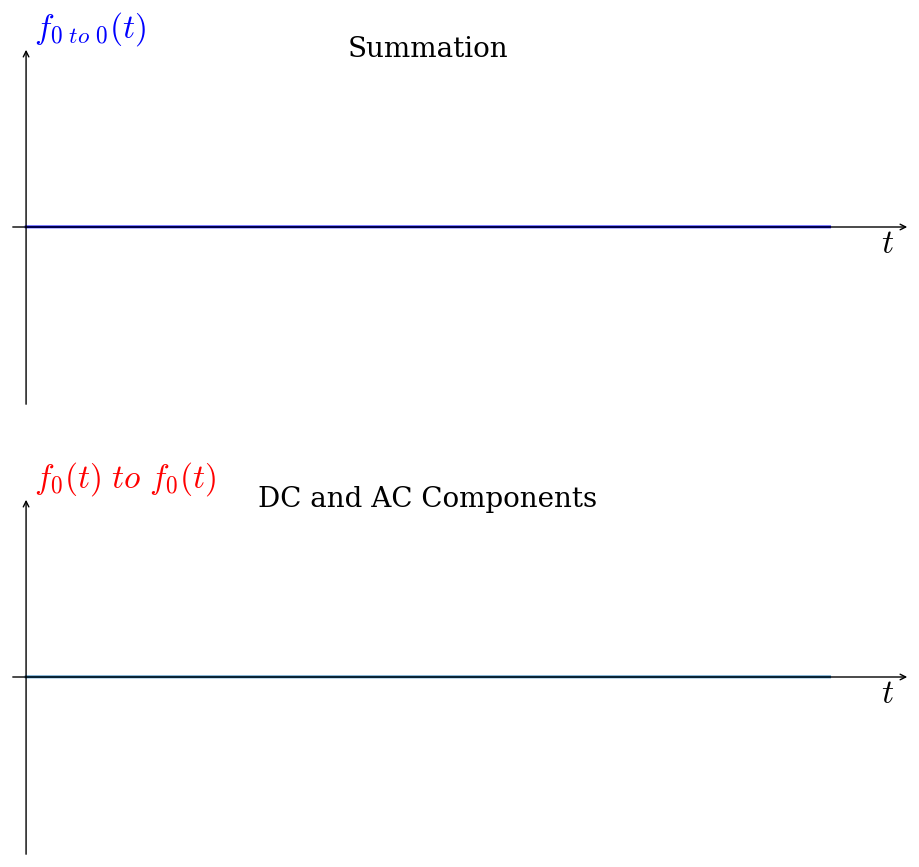

In [103]:
import matplotlib
from os import linesep
from numpy import linspace,cos,pi,sin,arccos,fft,angle,abs,clip,heaviside,tan,arctan
import matplotlib.pyplot as plt
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

# functions
def spectrum(xt): #spectrum - magnitude and angle
  xfft = fft.rfft(xt)
  xfft_angle = angle(xfft)
  xfft_mag = abs(xfft)/len(xt)*2
  xfft_mag[0]=xfft_mag[0]*0.5 #adjust the dc component
  return xfft_mag,xfft_angle

def yh(A,theta,f,n,t): #nth order harmonic
  return A*cos(2*pi*n*f*t + theta)

def y_sum(Xfft,f,nn,t): #sum of components, nn: # of harmonics
  yy=0
  for i in range(nn+1): #dc component, fundamental & harmonics
    yy = yy + yh(Xfft[0][i], Xfft[1][i], f, i, t)
  return yy

# parameters
Nf = 50 # number of frames, also number of components to add
f1 = 1 #fundamental frequency

#time series of the waveforms
t = linspace(0,1,2048)
fts=[] # array for waveforms
fts.append((heaviside(cos(2*pi*f1*t),0)*2-1)*(heaviside(abs(cos(2*pi*f1*t))-0.2,0))) # square
fts.append(2/pi*arctan(tan(pi*f1*t))) # sawtooth rising
fts.append(-2/pi*arctan(tan(pi*f1*t))) # sawtooth falling
fts.append(2/pi*arccos(cos(2*pi*f1*t+pi))-1) # triangle
fts.append(clip((2/pi*arccos(cos(2*pi*f1*t+pi))-1)*2,-1,1)) # trapezoidal by clipping triangle
fts.append(abs(sin(pi*f1*t))) # rectified sinusoidal

#fourier series
f_fft=[] # array for fft of waveforms
for k in range(len(fts)):
  f_fft.append(spectrum(fts[k]))

fig = plt.figure(figsize=(9,9))
fig.tight_layout()
ax_frame = [[[0, 0.5, 1, .4], [-.02,1.1], [-1.5,1.5]], #summation
            [[0, 0,   1, .4], [-.02,1.1], [-1.5,1.5]], #harmonics+fundamental
            ]# [pos-boundary, xlim, ylim] for subplots
ax_lbl=[['', '$t$'],
        ['', '$t$'],
        ] #variables for yx axes of each subplot
title_lst = ['Summation','DC and AC Components']
clst=['b','r'] #colors of lines
ax_lst=[] #axis list or the list of subplots
ylabel_lst=[] #y-labels to update
lines = [] #array containing all the fft components
for k in range(len(ax_frame)):
  xn,xm,yn,ym = ax_frame[k][1]+ax_frame[k][2]
  ax=fig.add_axes(ax_frame[k][0],xlim=[xn,xm], ylim=[yn,ym],fc='none') #no fc
  ax.axis('off') #turn off axis frames
  ax_lst.append(ax)
  ax.annotate("", (xm, 0), (xn, 0),arrowprops={'arrowstyle':"->"}) #x-axis
  ax.annotate("", (0,ym), (0,yn),arrowprops={'arrowstyle':"->"}) #y-axis
  if k==0:
    line_sum = ax.plot([], [],color='b', lw=2)[0]
  else:
    for i in range(Nf):
      lines.append(ax.plot([], [], lw=2)[0]) #lines to plot
  ax.text(xm-.02,0,ax_lbl[k][-1],size=24,va='top',ha='right') #x-axis label
  ylabel_lst.append(ax.text(0.01,ym,ax_lbl[k][0],size=24,va='bottom',color=clst[k])) #y label
  ax.text(0.5,ax_frame[k][2][1]+0.1,title_lst[k],va='top',ha='center',size=20)

# animation function. This is called sequentially
def animate(i):
  k = int(i/Nf)
  ii = i%Nf
  if ii==0: #remove the previous lines for starting a new waveform
    for l in lines:
      l.set_data([],[])
  line_sum.set_data(t,y_sum(f_fft[k],f1,ii,t)) #update the summation line
  # line_sum.set_data(t,fts[4]) #update the summation line
  lines[ii].set_data(t,yh(f_fft[k][0][ii],f_fft[k][1][ii],f1,ii,t)) #components
  ylabel_lst[0].set_text('$f_{0\ to\ '+str(ii)+'}(t)$') #update y-label
  ylabel_lst[1].set_text('$f_{0}(t)\ to\ f_{'+str(ii)+'}(t)$') #update y-label
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf*len(fts), interval=6)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = r"FourierSeries_multple.mp4"
writervideo = animation.FFMpegWriter(fps=10)
anim.save(fn, writer=writervideo,dpi = 120)